# LIBRARIES 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as npy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mat_plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# 

# IMPORTING DATASET

In [3]:
#Read dataset
dataSet = pd.read_csv('CICIDS2017_sample.csv') 
#The data is visualized based on the attacks 
# The results in this code is based on the original CICIDS2017 dataset. Please go to cell [21] if you work on the sampled dataset. 

In [4]:
dataSet

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,234,2,2,64,232,32,32,32.000000,0.000000,116,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56657,133288,2,2,94,482,47,47,47.000000,0.000000,241,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56658,11507694,5,4,450,3525,450,0,90.000000,201.246118,3525,...,32,893.0,0.0,893,893,6503640.0,0.0,6503640,6503640,DoS
56659,11507707,8,6,416,11632,416,0,52.000000,147.078211,5792,...,32,897.0,0.0,897,897,6503122.0,0.0,6503122,6503122,DoS


In [5]:
#To get the count of attacks in the dataset
dataSet.Label.value_counts()

BENIGN          22731
DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: Label, dtype: int64

# 

# VISUALIZATION OF DATA 

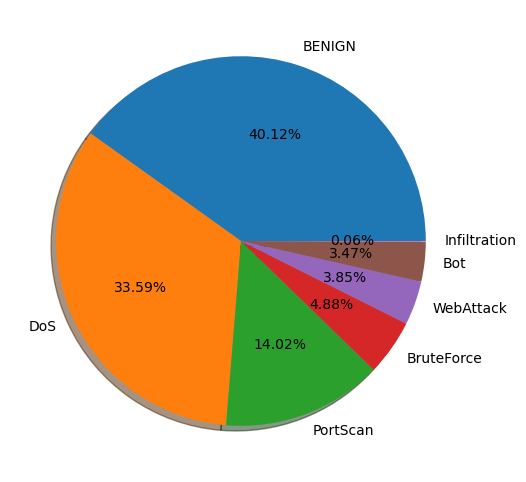

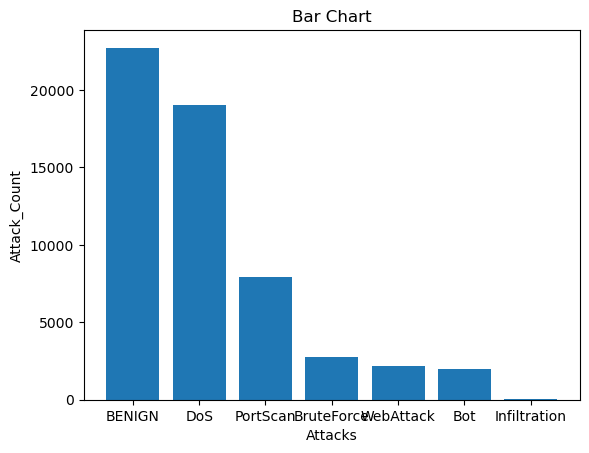

In [39]:
#Different types of attacks present in the Dataset 
labels=['BENIGN', 'DoS','PortScan','BruteForce', 'WebAttack','Bot','Infiltration']     
#print(labels)
#The Total Count of each individual attack
values=list(dataSet.Label.value_counts())
#Plot Figure is used to display the data based on the given size
mat_plt.figure(figsize=(9,6))
#To represent the data in the form of pie
mat_plt.pie(values,labels=labels,autopct='%.2f%%',shadow=True)
mat_plt.show()

#Bar Diagram
x = npy.array(list(labels)) 
y = npy.array(list(dataSet.Label.value_counts())) 
fig, ax = mat_plt.subplots() 
ax.bar(x, y)
ax.set_title("Bar Chart") 
ax.set_xlabel("Attacks") 
ax.set_ylabel("Attack_Count") 
mat_plt.show()


# 

# DATA PREPROCESSING

In [7]:
# Z-score normalization 
# Here we used Z-score inorder to remove the outliers in the dataset and to normalize the features into similar scale
features = dataSet.dtypes[dataSet.dtypes != 'object'].index
dataSet[features] = dataSet[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by -1
dataSet = dataSet.fillna(-1)

In [8]:
#LabelEncoder is used to convert categorical(non-numeric) data into numeric values.
labelencoder = LabelEncoder()
#The Attacks such as 'BENIGN', 'DoS','PortScan','BruteForce', 'WebAttack','Bot' and 'Infiltration' converted into numeric values based on the alphabetical order
dataSet.iloc[:, -1] = labelencoder.fit_transform(dataSet.iloc[:, -1])

In [9]:
#The count of attacks are found and assigned to respective attacks in numeric form
dataSet.Label.value_counts()

0    22731
3    19035
5     7946
2     2767
6     2180
1     1966
4       36
Name: Label, dtype: int64

In [10]:
# retain the minority class instances and sample the majority class instances
df_minor = dataSet[(dataSet['Label']==6)|(dataSet['Label']==1)|(dataSet['Label']==4)]
df_major = dataSet.drop(df_minor.index)

In [11]:
X = df_major.drop(['Label'],axis=1) 
y = df_major.iloc[:, -1].values.reshape(-1,1)
print(y)
y=npy.ravel(y)
print(y)

[[0]
 [0]
 [0]
 ...
 [3]
 [3]
 [3]]
[0 0 0 ... 3 3 3]


In [12]:
# use k-means to cluster the data samples and select a proportion of data from each cluster
from sklearn.cluster import MiniBatchKMeans
k_means = MiniBatchKMeans(n_clusters=1000, random_state=0).fit(X)

In [13]:
klabel=k_means.labels_
df_major['klabel']=klabel

In [14]:
df_major['klabel'].value_counts()

451    546
613    487
79     369
515    348
257    332
      ... 
397      2
566      2
670      2
889      1
12       1
Name: klabel, Length: 979, dtype: int64

In [15]:
cols = list(df_major)
cols.insert(78, cols.pop(cols.index('Label')))
df_major = df_major.loc[:, cols]

In [16]:
df_major

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,klabel,Label
0,-0.528470,-0.068426,-0.081806,-0.032573,-0.048343,-0.202326,-0.085798,-0.141625,-0.176448,-0.559719,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,133,0
1,-0.524593,0.704878,0.850340,0.027749,0.920410,0.603275,-0.211174,-0.082434,0.240596,1.006302,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,410,0
2,-0.525233,0.300651,0.339163,0.020443,0.363712,0.603275,-0.211174,0.044064,0.439619,0.484295,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,682,0
3,-0.524560,0.652153,0.745098,0.026625,0.933533,0.603275,-0.211174,-0.074097,0.257378,1.006302,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,410,0
4,-0.524555,0.757604,0.805237,0.028030,0.960037,0.603275,-0.211174,-0.091861,0.225734,1.006302,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,-0.528463,-0.068426,-0.051737,-0.031309,-0.046220,-0.200831,0.457498,-0.064078,-0.255104,-0.517901,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,851,0
56657,-0.524840,-0.068426,-0.051737,-0.029904,-0.043932,-0.178412,0.770939,0.022086,-0.255104,-0.472838,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,976,0
56658,-0.215111,-0.015701,-0.021667,-0.013231,-0.016083,0.423920,-0.211174,0.269089,0.640328,0.711051,...,-0.108682,-0.081786,-0.127669,-0.093554,-0.256386,-0.137651,-0.269448,-0.238252,352,3
56659,-0.215111,0.037025,0.008402,-0.014823,0.058109,0.373103,-0.211174,0.050807,0.399311,1.528310,...,-0.108677,-0.081786,-0.127664,-0.093548,-0.256402,-0.137651,-0.269464,-0.238268,980,3


In [17]:
def typicalSampling(group):
    name = group.name
    frac = 0.008
    return group.sample(frac=frac)

result = df_major.groupby(
    'klabel', group_keys=False
).apply(typicalSampling)

In [18]:
result['Label'].value_counts()

0    117
3    107
5     59
2     20
Name: Label, dtype: int64

In [19]:
result

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,klabel,Label
6740,-0.418611,-0.033276,-0.081806,-0.033182,-0.048343,-0.239691,-0.085798,-0.213428,-0.255104,-0.559719,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,2,3
125,-0.528464,-0.068426,-0.051737,-0.029904,-0.046549,-0.178412,0.770939,0.022086,-0.255104,-0.524390,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,9,0
5551,-0.522925,-0.050851,0.023436,-0.033088,0.057826,-0.218767,-0.211174,-0.198110,-0.209439,1.019281,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,10,3
4496,-0.527623,-0.050851,0.008402,-0.033088,0.057826,-0.218767,-0.211174,-0.198110,-0.209439,1.019281,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,10,3
12400,-0.528468,-0.086001,-0.066771,-0.034306,-0.048288,-0.248659,-0.211174,-0.247894,-0.255104,-0.557556,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34288,-0.521576,-0.086001,-0.066771,-0.032058,-0.046311,-0.176917,0.791835,0.027830,-0.255104,-0.479688,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,976,0
52675,-0.076900,0.037025,0.008402,-0.014355,0.058109,0.388049,-0.211174,0.057988,0.415042,1.023607,...,-0.107792,-0.081786,-0.126968,-0.092591,-0.097827,-0.137651,-0.115082,-0.078546,980,3
43160,2.179793,0.001874,-0.006633,-0.020584,0.057771,0.189265,-0.211174,0.032617,0.277123,3.094331,...,-0.108563,-0.081786,-0.127575,-0.093425,2.630715,-0.137651,2.541308,2.669721,984,3
54651,-0.527825,-0.068426,-0.051737,-0.029904,-0.046897,-0.178412,0.770939,0.022086,-0.255104,-0.531240,...,-0.109889,-0.081786,-0.128620,-0.094860,-0.458729,-0.137651,-0.466440,-0.442057,987,0


In [20]:
result = result.drop(['klabel'],axis=1)
result = result.append(df_minor)

In [21]:
result.to_csv('CICIDS2017_sample_km.csv',index=0)

In [22]:
# Read the sampled dataset
df=pd.read_csv('CICIDS2017_sample_km.csv')

In [23]:
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=npy.ravel(y)

# 

# SPLIT DATA FOR TRAIN AND TEST

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

# 

# FEATURE ENIGNEERING

In [25]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train, y_train)

In [26]:
# calculate the sum of importance scores
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
featureScaling = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    featureScaling.append(f_list[i][1])

In [27]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
featureScaling = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    featureScaling.append(f_list2[i][1])
    if Sum2>=0.9:
        break        

In [28]:
X_fs = df[featureScaling].values

In [29]:
X_fs.shape

(4485, 42)

In [30]:
from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)
#fcbf.fit(X_fs, y)

In [31]:
X_fss = fcbf.fit_transform(X_fs,y)

In [32]:
X_fss.shape

(4485, 20)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_fss,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [34]:
X_train.shape

(3588, 20)

In [35]:
pd.Series(y_train).value_counts()

6    1744
1    1573
0      93
3      86
5      47
4      29
2      16
dtype: int64

In [36]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={2:1000,4:1000})

In [37]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [38]:
pd.Series(y_train).value_counts()

6    1744
1    1573
2    1000
4    1000
0      93
3      86
5      47
dtype: int64